In [24]:
# Uses python3
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cmocean
import matplotlib
import gsw
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

Text(0.5,1,'Temperature')

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


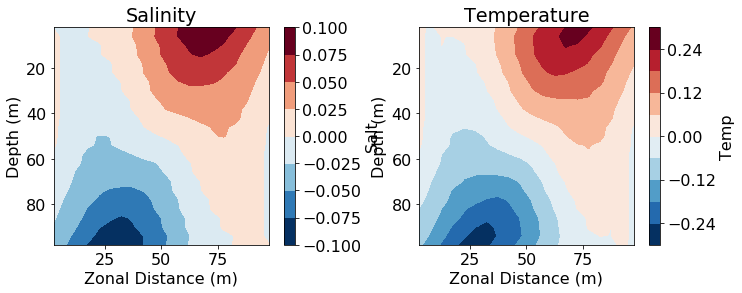

In [161]:
initial_z = xarray.open_dataset('teos10/z/Initial_state.nc', decode_times = False).mean(dim='lath')
initial_z.load()
initial_z.rename( { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' }, inplace=True )
linear_z = xarray.open_dataset('teos10/z/prog.nc', decode_times = False).mean(dim='yh')
linear_z.load()
rename_vars = {'xh':'Zonal Distance (m)', 'zl':'Depth (m)', 'temp':'Temp','salt':'Salt'}
initial_z.rename(rename_vars,inplace=True)
linear_z.rename(rename_vars,inplace=True)
initial_z['sigma0'] = (initial_z.Salt.dims,gsw.density.sigma0(initial_z.Salt,initial_z.Temp))

plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
(initial_z.Salt[0,:,:]-linear_z.Salt[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Salinity')
ax = plt.subplot(1,2,2)
(initial_z.Temp[0,:,:]-linear_z.Temp[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Temperature')


/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


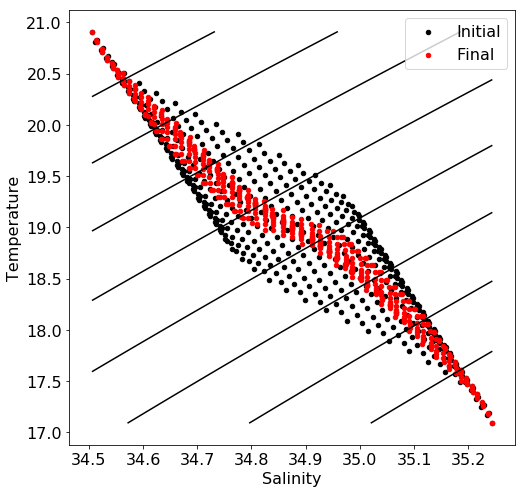

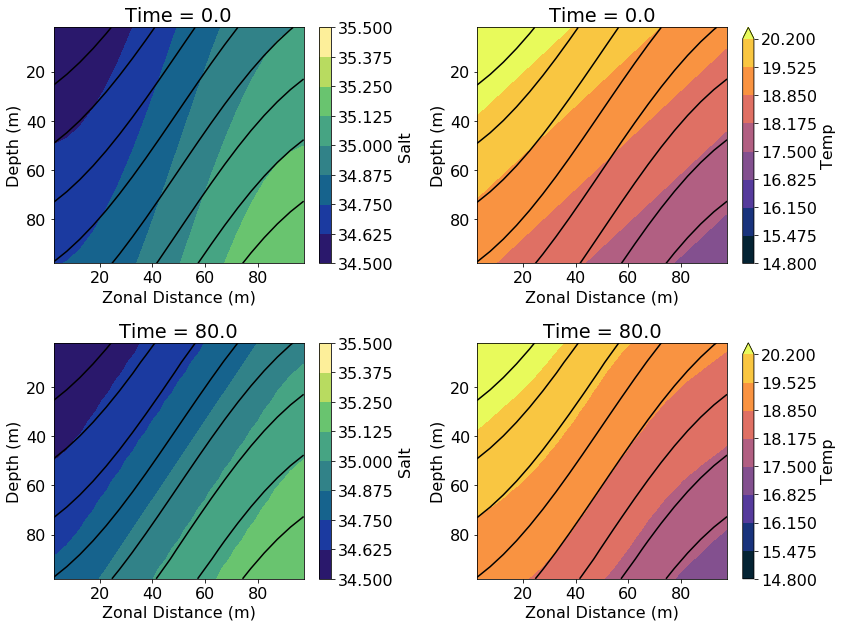

In [162]:
temp = np.linspace(initial_z.Temp.min(),initial_z.Temp.max(),100)
salt = np.linspace(initial_z.Salt.min(),initial_z.Salt.max(),100)
temp,salt = np.meshgrid(temp,salt)
sigma0 = gsw.density.sigma0(salt,temp)
dlevels = np.linspace(initial_z.sigma0.min(),initial_z.sigma0.max(),10)

plt.figure(figsize=(8,8))
plt.scatter(initial_z.Salt,initial_z.Temp,s=20.,c='k',label='Initial')
plt.scatter(linear_z.Salt[-1,:,:],linear_z.Temp[-1,:,:],s=20.,c='r',label='Final')
plt.contour(salt,temp,sigma0,dlevels,colors='k')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()
# plt.gca().set(adjustable='box-forced', aspect='equal')

smin = 34.5 ; smax = 35.5
tmin = 14.8 ; tmax = 20.2


plt.figure(figsize=(12,9))
idx = 1
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Salt[0,:,:],levels=9,vmin=smin,vmax=smax, cmap=cmocean.cm.haline); plt.gca().invert_yaxis()
plt.contour(initial_z['Zonal Distance (m)'],initial_z['Depth (m)'],initial_z.sigma0[0,:,:], dlevels, colors='k');
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Temp[0,:,:],levels=9,vmin=tmin,vmax=tmax, cmap=cmocean.cm.thermal); plt.gca().invert_yaxis()
plt.contour(initial_z['Zonal Distance (m)'],initial_z['Depth (m)'],initial_z.sigma0[0,:,:], dlevels, colors='k');
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Salt[-1,:,:],levels=9,vmin=smin,vmax=smax, cmap=cmocean.cm.haline); plt.gca().invert_yaxis()
plt.contour(linear_z['Zonal Distance (m)'],linear_z['Depth (m)'],linear_z.rhopot0[0,:,:]-1000, dlevels, colors='k');
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Temp[-1,:,:],levels=9,vmin=tmin,vmax=tmax, cmap=cmocean.cm.thermal); plt.gca().invert_yaxis()
plt.contour(linear_z['Zonal Distance (m)'],linear_z['Depth (m)'],linear_z.rhopot0[0,:,:]-1000, dlevels, colors='k');
plt.tight_layout()


In [160]:
linear_z['sigma0'] = (linear_z.Salt.dims,gsw.density.sigma0(linear_z.Salt,linear_z.Temp))

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


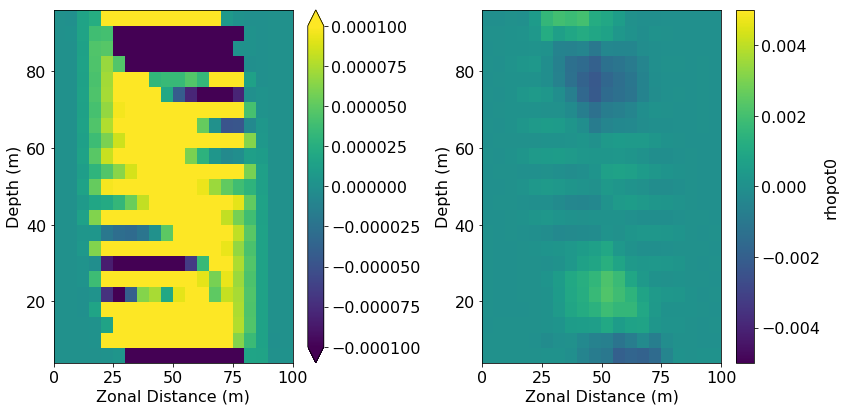

In [157]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
xarray.plot.pcolormesh(linear_z['rhopot0'][0,1:-1,:]-initial_z.sigma0[0,1:-1,:]-1000,vmin = -1e-4, vmax= 1e-4)
plt.subplot(1,2,2)
xarray.plot.pcolormesh(linear_z['rhopot0'][-1,1:-1,:]-linear_z.rhopot0[0,1:-1,:],vmin = -5e-3, vmax= 5e-3)
plt.tight_layout()

In [33]:
initial_z['sigma0'].max()

<xarray.DataArray 'sigma0' ()>
array(26.00738908704352)